**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 14. 베스트 모델 만들기

이번 챕터에서는 베스트 모델을 만들어 보도록 한다.

## 14.1 기본

실습에 사용할 데이터는 UCI 저장소에 있는 레드와인 샘플과 화이트와인 샘플을 사용한다.

원래는 두 데이터가 각각 분리된 데이터인데, 하나로 합쳐서 레드와인과 화이트와인을 구분하도록 한다.

데이터의 구조는 다음과 같다.

- 0: 주석산 농도


- 1: 아세트산 농도


- 2: 구연산 농도


- 3: 잔류 당분 농도


- 4: 염화나트륨 농도


- 5: 유리 아황산 농도


- 6: 총 아황산 농도


- 7: 밀도


- 8: pH


- 9: 황산칼륨 농도


- 10: 알코올 도수


- 11: 와인의 맛(0~10등급)


- 12: class (1: 레드와인, 0: 화이트와인)

In [3]:
df_all = pd.read_csv("deeplearning/dataset/wine.csv", header=None)
df = df_all.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2052,6.0,0.27,0.27,1.60,0.046,32.0,113.0,0.99240,3.41,0.51,10.5,7,0
6476,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5,0
5902,6.9,0.26,0.29,4.20,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0
992,6.5,0.40,0.10,2.00,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6,1
4247,6.6,0.23,0.29,14.45,0.057,29.0,144.0,0.99756,3.33,0.54,10.2,6,0


- `sample()` 함수를 사용하면 원본 데이터에서 정해진 비율만큼 랜덤으로 샘플을 추출한다.


- `frac` 옵션을 1로 주면 100%를 불러오며 0.3으로 지정한다면 30%를 추출한다.


- 현재는 전체를 불러왔지만 index 순서가 랜덤한 것을 확인 가능하다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 2052 to 4874
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


- 데이터는 샘플 6,497개, 12개의 피처와 타겟으로 구성되어 있다.


- 위 데이터로 딥러닝 모델을 실행 해보자.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 시드 설정
np.random.seed(0)
tf.random.set_seed(3)

# 데이터 샘플 100%
df = df_all.sample(frac=1)

# 데이터 분리
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

# 결과 출력
print("-"*100)
print(f"Accuracy: {model.evaluate(X, Y, verbose=0)[1]: .4f}")

Train on 6497 samples
Epoch 1/200
6497/6497 [==============================] - 1s 94us/sample - loss: 0.6227 - accuracy: 0.7642
Epoch 2/200
6497/6497 [==============================] - 0s 7us/sample - loss: 0.2953 - accuracy: 0.9050
Epoch 3/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.2411 - accuracy: 0.9254
Epoch 4/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.2267 - accuracy: 0.9280
Epoch 5/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.2185 - accuracy: 0.9295
Epoch 6/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.2125 - accuracy: 0.9298
Epoch 7/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.2052 - accuracy: 0.9312
Epoch 8/200
6497/6497 [==============================] - 0s 7us/sample - loss: 0.1960 - accuracy: 0.9343
Epoch 9/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.1910 - accuracy: 0.9350
Epoch 10/200
6497/6497 [========

6497/6497 [==============================] - 0s 7us/sample - loss: 0.0652 - accuracy: 0.9800
Epoch 79/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0659 - accuracy: 0.9803
Epoch 80/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0671 - accuracy: 0.9794
Epoch 81/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0682 - accuracy: 0.9797
Epoch 82/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0625 - accuracy: 0.9788
Epoch 83/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0616 - accuracy: 0.9800
Epoch 84/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0619 - accuracy: 0.9811
Epoch 85/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0608 - accuracy: 0.9818
Epoch 86/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0634 - accuracy: 0.9801
Epoch 87/200
6497/6497 [==============================] - 0

6497/6497 [==============================] - 0s 6us/sample - loss: 0.0559 - accuracy: 0.9825
Epoch 155/200
6497/6497 [==============================] - 0s 7us/sample - loss: 0.0515 - accuracy: 0.9835
Epoch 156/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0539 - accuracy: 0.9840
Epoch 157/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0512 - accuracy: 0.9851
Epoch 158/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0520 - accuracy: 0.9846
Epoch 159/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0534 - accuracy: 0.9837
Epoch 160/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0509 - accuracy: 0.9840
Epoch 161/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0547 - accuracy: 0.9825
Epoch 162/200
6497/6497 [==============================] - 0s 6us/sample - loss: 0.0603 - accuracy: 0.9820
Epoch 163/200
6497/6497 [==========================

- 교재는 여기서 `keras` 패키지를 사용하는데 나는 `tensorflow`의 keras를 사용하였다.


- 이유는 이전 포스팅 [과적합 피하기](https://romg2.github.io/dl_all/01-%EB%AA%A8%EB%91%90%EC%9D%98-%EB%94%A5%EB%9F%AC%EB%8B%9D-04.-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B3%B8%EA%B8%B0-%EB%8B%A4%EC%A7%80%EA%B8%B0-(4)/)에 자세히 적어두었다.


- 예측 정확도는 약 98.68%로 나타났다.

## 14.2 저장

이번엔 각 epoch별로 모델을 저장해보도록 하자.

In [6]:
import os

model_dir = "./model"

# 해당 폴더가 존재하지 않으면 폴더 생성
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

- 먼저 각 epoch별 모델을 저장할 디렉토리를 생성하였다.

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장 경로 지정
modelpath = "./model/{epoch:04d}-{val_loss:.4f}.hdf5"

# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", 
                               verbose=1, save_best_only=True)

- `ModelCheckpoint()`로 모델이 저장될 경로와 모니터할 값을 지정한다.


- test 오차는 "val_loss", test 정확도는 "val_accuracy", train 오차는 "loss"로 기록된다.


- `save_best_only` 옵션을 True로 설정하면 앞서 저장한 모델보다 나아졌을 때만 저장한다.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 샘플 100%
df = df_all.sample(frac=1)

# 데이터 분리
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", 
                               verbose=1, save_best_only=True)

# 모델 실행 (결과 저장)
model.fit(X, Y, validation_split=0.2, 
          epochs=200, batch_size=200, 
          verbose = 0, 
          callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.40064, saving model to ./model/0001-0.4006.hdf5

Epoch 00002: val_loss improved from 0.40064 to 0.29953, saving model to ./model/0002-0.2995.hdf5

Epoch 00003: val_loss improved from 0.29953 to 0.24968, saving model to ./model/0003-0.2497.hdf5

Epoch 00004: val_loss improved from 0.24968 to 0.23435, saving model to ./model/0004-0.2344.hdf5

Epoch 00005: val_loss improved from 0.23435 to 0.22733, saving model to ./model/0005-0.2273.hdf5

Epoch 00006: val_loss improved from 0.22733 to 0.22653, saving model to ./model/0006-0.2265.hdf5

Epoch 00007: val_loss improved from 0.22653 to 0.21384, saving model to ./model/0007-0.2138.hdf5

Epoch 00008: val_loss improved from 0.21384 to 0.20610, saving model to ./model/0008-0.2061.hdf5

Epoch 00009: val_loss improved from 0.20610 to 0.20520, saving model to ./model/0009-0.2052.hdf5

Epoch 00010: val_loss improved from 0.20520 to 0.20340, saving model to ./model/0010-0.2034.hdf5

Epoch 00011: val_loss i


Epoch 00110: val_loss did not improve from 0.05855

Epoch 00111: val_loss did not improve from 0.05855

Epoch 00112: val_loss did not improve from 0.05855

Epoch 00113: val_loss improved from 0.05855 to 0.05793, saving model to ./model/0113-0.0579.hdf5

Epoch 00114: val_loss did not improve from 0.05793

Epoch 00115: val_loss did not improve from 0.05793

Epoch 00116: val_loss improved from 0.05793 to 0.05782, saving model to ./model/0116-0.0578.hdf5

Epoch 00117: val_loss improved from 0.05782 to 0.05707, saving model to ./model/0117-0.0571.hdf5

Epoch 00118: val_loss did not improve from 0.05707

Epoch 00119: val_loss improved from 0.05707 to 0.05678, saving model to ./model/0119-0.0568.hdf5

Epoch 00120: val_loss did not improve from 0.05678

Epoch 00121: val_loss improved from 0.05678 to 0.05631, saving model to ./model/0121-0.0563.hdf5

Epoch 00122: val_loss did not improve from 0.05631

Epoch 00123: val_loss did not improve from 0.05631

Epoch 00124: val_loss did not improve fro

- `fit()` 함수에 `validation_split` 옵션을 0.2로 설정하여 데이터의 20%를 성능평가에 사용한다.


- `callbacks` 옵션에 앞서 생성한 `ModelCheckpoint()`를 지정한다.


- val_loss가 줄어들었을때만 모델을 저장한다.

## 14.3 시각화

앞서 모델의 오차가 줄어드는 경우만 저장하여 epoch가 몇 일때 오차가 가장 작은지 확인하였다.

이를 시각화해서 살펴보자.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 샘플 15%
df = df_all.sample(frac=0.15)

# 데이터 분리
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 실행
history1 = model.fit(X, Y, validation_split=0.33, 
                     epochs=3500, batch_size=500, 
                     verbose = 0)

- 우선 시간을 고려해서 데이터는 전체 샘플의 15%만 사용하였다.


- `validation_split`은 0.33으로 설정하였고 epoch 수를 3500으로 증가시켰다.


- epoch별 결과를 history1에 저장하였다.

In [10]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- `history` 속성에는 train과 test에 대한 오차, 정확도가 epoch별로 dictionary 형태로 저장되어 있다.


- 이를 이용해서 시각화를 진행해보자.

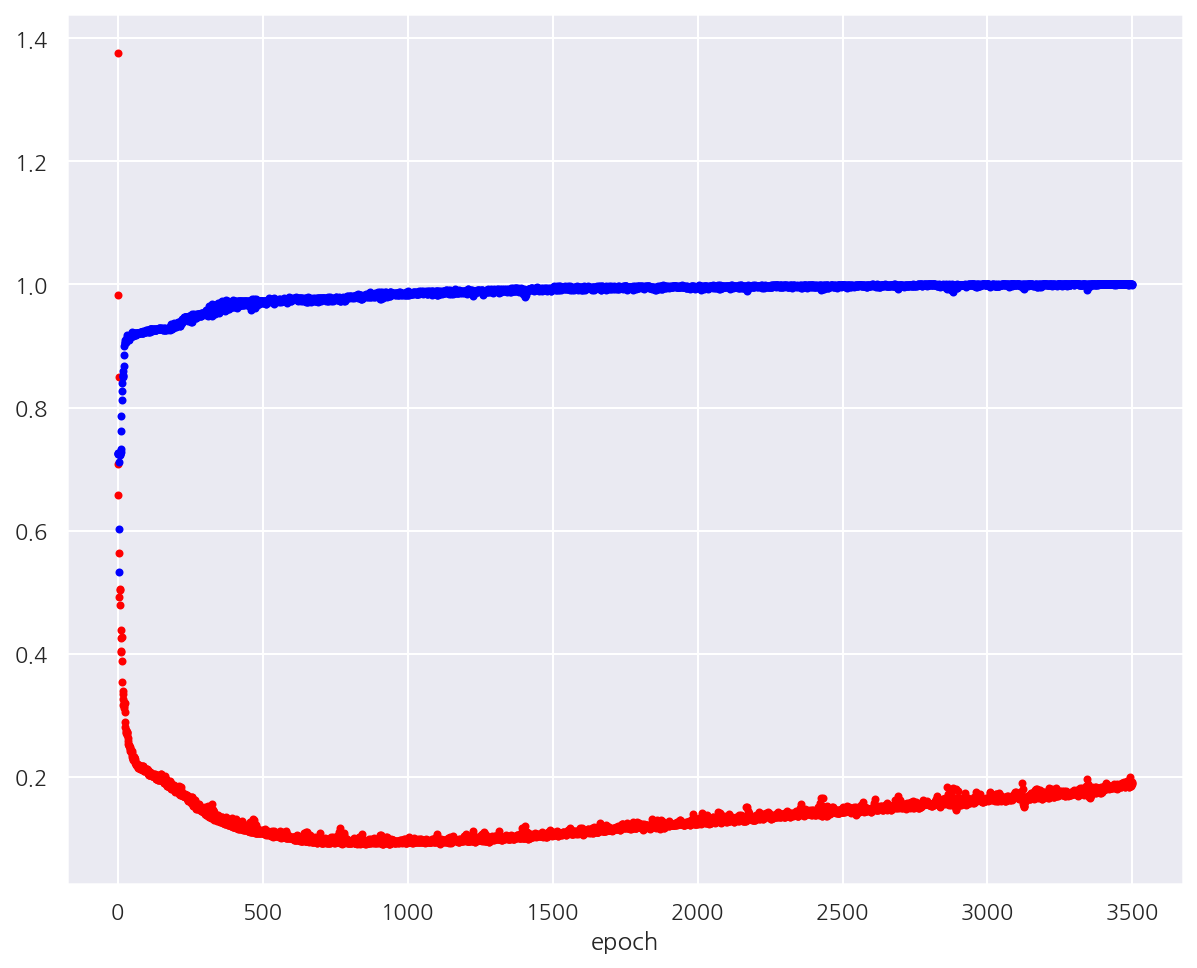

In [11]:
# test 오차, train 정확도 시각화
y_vloss = history1.history["val_loss"]
y_acc = history1.history["accuracy"]
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3) # test 오차
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)  # train 정확도
plt.xlabel("epoch")
plt.show()

- epoch가 증가하면서 train 정확도는 계속 증가하여 100%가 된다.


- 반면, test 오차는 처음에는 감소하다가 점차 다시 증가하게 된다.


- 이는 과적합으로 인한 문제이다.

## 14.4 조기 중단

epoch가 증가할수록 과적합 문제가 발생하기 때문에 test에 대한 결과는 점점 나빠진다.


test 오차가 줄지 않으면 학습을 멈추게 조기 중단을 지정해보자.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

- `EarlyStopping()`으로 모니터할 값을 지정한다.


- `patience=100`은 100번의 epoch가 지나도록 모니터할 값이 나아지지 않으면 중단하도록 한다.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 샘플 15%
df = df_all.sample(frac=0.15)

# 데이터 분리
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, 
          epochs=2000, batch_size=500, 
          verbose = 1, 
          callbacks = [early_stopping_callback])

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 0s 536us/sample - loss: 2.0167 - accuracy: 0.7256 - val_loss: 1.2055 - val_accuracy: 0.7744
Epoch 2/2000
780/780 [==============================] - 0s 16us/sample - loss: 1.5271 - accuracy: 0.7256 - val_loss: 0.8585 - val_accuracy: 0.7744
Epoch 3/2000
780/780 [==============================] - 0s 19us/sample - loss: 1.0554 - accuracy: 0.7256 - val_loss: 0.5770 - val_accuracy: 0.7744
Epoch 4/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.6991 - accuracy: 0.7231 - val_loss: 0.7414 - val_accuracy: 0.6000
Epoch 5/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.7627 - accuracy: 0.5718 - val_loss: 0.8747 - val_accuracy: 0.4410
Epoch 6/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.7685 - accuracy: 0.5282 - val_loss: 0.5473 - val_accuracy: 0.7282
Epoch 7/2000
780/780 [==============================] - 0s 18us/sample 

780/780 [==============================] - 0s 21us/sample - loss: 0.2597 - accuracy: 0.9167 - val_loss: 0.1955 - val_accuracy: 0.9179
Epoch 57/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.2589 - accuracy: 0.9154 - val_loss: 0.1960 - val_accuracy: 0.9179
Epoch 58/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2581 - accuracy: 0.9154 - val_loss: 0.1955 - val_accuracy: 0.9179
Epoch 59/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2573 - accuracy: 0.9167 - val_loss: 0.1940 - val_accuracy: 0.9179
Epoch 60/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.2562 - accuracy: 0.9154 - val_loss: 0.1925 - val_accuracy: 0.9179
Epoch 61/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.2555 - accuracy: 0.9141 - val_loss: 0.1908 - val_accuracy: 0.9179
Epoch 62/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.2545 - accuracy: 0.9141 - val_loss: 0.1901 -

780/780 [==============================] - 0s 20us/sample - loss: 0.2267 - accuracy: 0.9231 - val_loss: 0.1767 - val_accuracy: 0.9179
Epoch 112/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.2263 - accuracy: 0.9231 - val_loss: 0.1771 - val_accuracy: 0.9179
Epoch 113/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2256 - accuracy: 0.9231 - val_loss: 0.1767 - val_accuracy: 0.9179
Epoch 114/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.2252 - accuracy: 0.9231 - val_loss: 0.1769 - val_accuracy: 0.9179
Epoch 115/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.2245 - accuracy: 0.9231 - val_loss: 0.1775 - val_accuracy: 0.9179
Epoch 116/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2242 - accuracy: 0.9231 - val_loss: 0.1787 - val_accuracy: 0.9179
Epoch 117/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.2235 - accuracy: 0.9231 - val_loss: 0.

780/780 [==============================] - 0s 19us/sample - loss: 0.2005 - accuracy: 0.9321 - val_loss: 0.1612 - val_accuracy: 0.9385
Epoch 167/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2000 - accuracy: 0.9308 - val_loss: 0.1635 - val_accuracy: 0.9385
Epoch 168/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.2004 - accuracy: 0.9321 - val_loss: 0.1644 - val_accuracy: 0.9436
Epoch 169/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1996 - accuracy: 0.9321 - val_loss: 0.1595 - val_accuracy: 0.9385
Epoch 170/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1991 - accuracy: 0.9321 - val_loss: 0.1545 - val_accuracy: 0.9385
Epoch 171/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1988 - accuracy: 0.9295 - val_loss: 0.1541 - val_accuracy: 0.9436
Epoch 172/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1986 - accuracy: 0.9295 - val_loss: 0.

780/780 [==============================] - 0s 21us/sample - loss: 0.1740 - accuracy: 0.9500 - val_loss: 0.1358 - val_accuracy: 0.9538
Epoch 222/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1732 - accuracy: 0.9487 - val_loss: 0.1379 - val_accuracy: 0.9590
Epoch 223/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1735 - accuracy: 0.9487 - val_loss: 0.1385 - val_accuracy: 0.9590
Epoch 224/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1723 - accuracy: 0.9487 - val_loss: 0.1328 - val_accuracy: 0.9538
Epoch 225/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1723 - accuracy: 0.9500 - val_loss: 0.1309 - val_accuracy: 0.9538
Epoch 226/2000
780/780 [==============================] - 0s 18us/sample - loss: 0.1718 - accuracy: 0.9487 - val_loss: 0.1347 - val_accuracy: 0.9590
Epoch 227/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1704 - accuracy: 0.9487 - val_loss: 0.

780/780 [==============================] - 0s 22us/sample - loss: 0.1482 - accuracy: 0.9526 - val_loss: 0.1149 - val_accuracy: 0.9641
Epoch 277/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1474 - accuracy: 0.9513 - val_loss: 0.1175 - val_accuracy: 0.9692
Epoch 278/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1465 - accuracy: 0.9526 - val_loss: 0.1208 - val_accuracy: 0.9692
Epoch 279/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1463 - accuracy: 0.9564 - val_loss: 0.1192 - val_accuracy: 0.9692
Epoch 280/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1459 - accuracy: 0.9551 - val_loss: 0.1170 - val_accuracy: 0.9692
Epoch 281/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1453 - accuracy: 0.9551 - val_loss: 0.1189 - val_accuracy: 0.9692
Epoch 282/2000
780/780 [==============================] - 0s 23us/sample - loss: 0.1445 - accuracy: 0.9551 - val_loss: 0.

780/780 [==============================] - 0s 20us/sample - loss: 0.1273 - accuracy: 0.9654 - val_loss: 0.1068 - val_accuracy: 0.9692
Epoch 331/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1282 - accuracy: 0.9628 - val_loss: 0.1060 - val_accuracy: 0.9744
Epoch 332/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1272 - accuracy: 0.9641 - val_loss: 0.1086 - val_accuracy: 0.9692
Epoch 333/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1279 - accuracy: 0.9641 - val_loss: 0.1043 - val_accuracy: 0.9744
Epoch 334/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1266 - accuracy: 0.9641 - val_loss: 0.1053 - val_accuracy: 0.9692
Epoch 335/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1257 - accuracy: 0.9654 - val_loss: 0.1024 - val_accuracy: 0.9744
Epoch 336/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.1258 - accuracy: 0.9603 - val_loss: 0.

780/780 [==============================] - 0s 19us/sample - loss: 0.1141 - accuracy: 0.9718 - val_loss: 0.0940 - val_accuracy: 0.9744
Epoch 386/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1134 - accuracy: 0.9692 - val_loss: 0.0965 - val_accuracy: 0.9692
Epoch 387/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1134 - accuracy: 0.9705 - val_loss: 0.0976 - val_accuracy: 0.9692
Epoch 388/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1130 - accuracy: 0.9705 - val_loss: 0.0929 - val_accuracy: 0.9744
Epoch 389/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1129 - accuracy: 0.9667 - val_loss: 0.0921 - val_accuracy: 0.9744
Epoch 390/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.1133 - accuracy: 0.9692 - val_loss: 0.0945 - val_accuracy: 0.9692
Epoch 391/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1124 - accuracy: 0.9705 - val_loss: 0.

780/780 [==============================] - 0s 19us/sample - loss: 0.1035 - accuracy: 0.9705 - val_loss: 0.0859 - val_accuracy: 0.9795
Epoch 441/2000
780/780 [==============================] - 0s 18us/sample - loss: 0.1031 - accuracy: 0.9705 - val_loss: 0.0857 - val_accuracy: 0.9795
Epoch 442/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1030 - accuracy: 0.9718 - val_loss: 0.0856 - val_accuracy: 0.9795
Epoch 443/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1034 - accuracy: 0.9718 - val_loss: 0.0850 - val_accuracy: 0.9795
Epoch 444/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1029 - accuracy: 0.9705 - val_loss: 0.0842 - val_accuracy: 0.9795
Epoch 445/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.1029 - accuracy: 0.9718 - val_loss: 0.0867 - val_accuracy: 0.9795
Epoch 446/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.1025 - accuracy: 0.9718 - val_loss: 0.

780/780 [==============================] - 0s 19us/sample - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.0806 - val_accuracy: 0.9795
Epoch 496/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0946 - accuracy: 0.9744 - val_loss: 0.0821 - val_accuracy: 0.9744
Epoch 497/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0946 - accuracy: 0.9731 - val_loss: 0.0803 - val_accuracy: 0.9795
Epoch 498/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.0941 - accuracy: 0.9731 - val_loss: 0.0784 - val_accuracy: 0.9795
Epoch 499/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0952 - accuracy: 0.9744 - val_loss: 0.0779 - val_accuracy: 0.9795
Epoch 500/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0949 - accuracy: 0.9731 - val_loss: 0.0829 - val_accuracy: 0.9744
Epoch 501/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0951 - accuracy: 0.9744 - val_loss: 0.

780/780 [==============================] - 0s 19us/sample - loss: 0.0873 - accuracy: 0.9756 - val_loss: 0.0728 - val_accuracy: 0.9846
Epoch 551/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.0736 - val_accuracy: 0.9744
Epoch 552/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0869 - accuracy: 0.9744 - val_loss: 0.0773 - val_accuracy: 0.9744
Epoch 553/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0874 - accuracy: 0.9744 - val_loss: 0.0778 - val_accuracy: 0.9744
Epoch 554/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0870 - accuracy: 0.9769 - val_loss: 0.0736 - val_accuracy: 0.9744
Epoch 555/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.0885 - accuracy: 0.9744 - val_loss: 0.0743 - val_accuracy: 0.9744
Epoch 556/2000
780/780 [==============================] - 0s 19us/sample - loss: 0.0876 - accuracy: 0.9744 - val_loss: 0.

780/780 [==============================] - 0s 23us/sample - loss: 0.0807 - accuracy: 0.9782 - val_loss: 0.0701 - val_accuracy: 0.9795
Epoch 606/2000
780/780 [==============================] - 0s 23us/sample - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0696 - val_accuracy: 0.9795
Epoch 607/2000
780/780 [==============================] - 0s 24us/sample - loss: 0.0816 - accuracy: 0.9756 - val_loss: 0.0739 - val_accuracy: 0.9744
Epoch 608/2000
780/780 [==============================] - 0s 23us/sample - loss: 0.0820 - accuracy: 0.9769 - val_loss: 0.0723 - val_accuracy: 0.9744
Epoch 609/2000
780/780 [==============================] - 0s 24us/sample - loss: 0.0808 - accuracy: 0.9769 - val_loss: 0.0688 - val_accuracy: 0.9795
Epoch 610/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0730 - val_accuracy: 0.9744
Epoch 611/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0808 - accuracy: 0.9769 - val_loss: 0.

Epoch 660/2000
780/780 [==============================] - 0s 20us/sample - loss: 0.0758 - accuracy: 0.9769 - val_loss: 0.0721 - val_accuracy: 0.9744
Epoch 661/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0757 - accuracy: 0.9782 - val_loss: 0.0739 - val_accuracy: 0.9744
Epoch 662/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0761 - accuracy: 0.9756 - val_loss: 0.0681 - val_accuracy: 0.9795
Epoch 663/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9795
Epoch 664/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.0700 - val_accuracy: 0.9744
Epoch 665/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.0746 - accuracy: 0.9782 - val_loss: 0.0721 - val_accuracy: 0.9744
Epoch 666/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0746 - accuracy: 0.9782

Epoch 715/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0713 - val_accuracy: 0.9744
Epoch 716/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.0684 - accuracy: 0.9808 - val_loss: 0.0682 - val_accuracy: 0.9744
Epoch 717/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.0683 - accuracy: 0.9808 - val_loss: 0.0673 - val_accuracy: 0.9744
Epoch 718/2000
780/780 [==============================] - 0s 23us/sample - loss: 0.0684 - accuracy: 0.9808 - val_loss: 0.0712 - val_accuracy: 0.9744
Epoch 719/2000
780/780 [==============================] - 0s 23us/sample - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0742 - val_accuracy: 0.9744
Epoch 720/2000
780/780 [==============================] - 0s 21us/sample - loss: 0.0684 - accuracy: 0.9782 - val_loss: 0.0695 - val_accuracy: 0.9744
Epoch 721/2000
780/780 [==============================] - 0s 22us/sample - loss: 0.0692 - accuracy: 0.9821

Epoch 770/2000
780/780 [==============================] - 0s 27us/sample - loss: 0.0620 - accuracy: 0.9872 - val_loss: 0.0677 - val_accuracy: 0.9846
Epoch 771/2000
780/780 [==============================] - 0s 26us/sample - loss: 0.0611 - accuracy: 0.9846 - val_loss: 0.0688 - val_accuracy: 0.9846
Epoch 772/2000
780/780 [==============================] - 0s 27us/sample - loss: 0.0605 - accuracy: 0.9846 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 773/2000
780/780 [==============================] - 0s 28us/sample - loss: 0.0611 - accuracy: 0.9846 - val_loss: 0.0704 - val_accuracy: 0.9795
Epoch 774/2000
780/780 [==============================] - 0s 27us/sample - loss: 0.0611 - accuracy: 0.9859 - val_loss: 0.0682 - val_accuracy: 0.9846
Epoch 775/2000
780/780 [==============================] - 0s 27us/sample - loss: 0.0604 - accuracy: 0.9846 - val_loss: 0.0725 - val_accuracy: 0.9795


- epoch을 2,000으로 설정하였는데 결과를 보면 775번까지만 실행하였다.


- 이는 675번째 epoch에서의 val_loss 0.0658에서 100번의 epoch가 진행되도록 감소하지 않아서이다.

## 14.5 저장 및 조기 중단

- 마지막으로 저장과 조기 중단 옵션을 같이 설정해보자.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 샘플 15%
df = df_all.sample(frac=0.15)

# 데이터 분리
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", 
                               verbose=1, save_best_only=True)

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, 
          epochs=2000, batch_size=500, 
          verbose = 0, 
          callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.20551, saving model to ./model/0001-1.2055.hdf5

Epoch 00002: val_loss improved from 1.20551 to 0.85854, saving model to ./model/0002-0.8585.hdf5

Epoch 00003: val_loss improved from 0.85854 to 0.57704, saving model to ./model/0003-0.5770.hdf5

Epoch 00004: val_loss did not improve from 0.57704

Epoch 00005: val_loss did not improve from 0.57704

Epoch 00006: val_loss improved from 0.57704 to 0.54728, saving model to ./model/0006-0.5473.hdf5

Epoch 00007: val_loss improved from 0.54728 to 0.44604, saving model to ./model/0007-0.4460.hdf5

Epoch 00008: val_loss improved from 0.44604 to 0.44429, saving model to ./model/0008-0.4443.hdf5

Epoch 00009: val_loss improved from 0.44429 to 0.43873, saving model to ./model/0009-0.4387.hdf5

Epoch 00010: val_loss improved from 0.43873 to 0.41459, saving model to ./model/0010-0.4146.hdf5

Epoch 00011: val_loss improved from 0.41459 to 0.38246, saving model to ./model/0011-0.3825.hdf5

Epoch 00012: val_


Epoch 00114: val_loss did not improve from 0.17667

Epoch 00115: val_loss did not improve from 0.17667

Epoch 00116: val_loss did not improve from 0.17667

Epoch 00117: val_loss did not improve from 0.17667

Epoch 00118: val_loss improved from 0.17667 to 0.17653, saving model to ./model/0118-0.1765.hdf5

Epoch 00119: val_loss improved from 0.17653 to 0.17482, saving model to ./model/0119-0.1748.hdf5

Epoch 00120: val_loss did not improve from 0.17482

Epoch 00121: val_loss did not improve from 0.17482

Epoch 00122: val_loss did not improve from 0.17482

Epoch 00123: val_loss did not improve from 0.17482

Epoch 00124: val_loss improved from 0.17482 to 0.17475, saving model to ./model/0124-0.1747.hdf5

Epoch 00125: val_loss did not improve from 0.17475

Epoch 00126: val_loss did not improve from 0.17475

Epoch 00127: val_loss did not improve from 0.17475

Epoch 00128: val_loss did not improve from 0.17475

Epoch 00129: val_loss improved from 0.17475 to 0.17085, saving model to ./model/0

Epoch 00237: val_loss did not improve from 0.12800

Epoch 00238: val_loss did not improve from 0.12800

Epoch 00239: val_loss did not improve from 0.12800

Epoch 00240: val_loss did not improve from 0.12800

Epoch 00241: val_loss improved from 0.12800 to 0.12660, saving model to ./model/0241-0.1266.hdf5

Epoch 00242: val_loss did not improve from 0.12660

Epoch 00243: val_loss did not improve from 0.12660

Epoch 00244: val_loss did not improve from 0.12660

Epoch 00245: val_loss improved from 0.12660 to 0.12544, saving model to ./model/0245-0.1254.hdf5

Epoch 00246: val_loss did not improve from 0.12544

Epoch 00247: val_loss did not improve from 0.12544

Epoch 00248: val_loss did not improve from 0.12544

Epoch 00249: val_loss did not improve from 0.12544

Epoch 00250: val_loss improved from 0.12544 to 0.12442, saving model to ./model/0250-0.1244.hdf5

Epoch 00251: val_loss improved from 0.12442 to 0.12211, saving model to ./model/0251-0.1221.hdf5

Epoch 00252: val_loss did not improv

Epoch 00376: val_loss did not improve from 0.09491

Epoch 00377: val_loss improved from 0.09491 to 0.09405, saving model to ./model/0377-0.0941.hdf5

Epoch 00378: val_loss did not improve from 0.09405

Epoch 00379: val_loss did not improve from 0.09405

Epoch 00380: val_loss did not improve from 0.09405

Epoch 00381: val_loss improved from 0.09405 to 0.09363, saving model to ./model/0381-0.0936.hdf5

Epoch 00382: val_loss did not improve from 0.09363

Epoch 00383: val_loss did not improve from 0.09363

Epoch 00384: val_loss did not improve from 0.09363

Epoch 00385: val_loss did not improve from 0.09363

Epoch 00386: val_loss did not improve from 0.09363

Epoch 00387: val_loss did not improve from 0.09363

Epoch 00388: val_loss improved from 0.09363 to 0.09292, saving model to ./model/0388-0.0929.hdf5

Epoch 00389: val_loss improved from 0.09292 to 0.09207, saving model to ./model/0389-0.0921.hdf5

Epoch 00390: val_loss did not improve from 0.09207

Epoch 00391: val_loss did not improv

Epoch 00520: val_loss did not improve from 0.07363

Epoch 00521: val_loss did not improve from 0.07363

Epoch 00522: val_loss did not improve from 0.07363

Epoch 00523: val_loss did not improve from 0.07363

Epoch 00524: val_loss did not improve from 0.07363

Epoch 00525: val_loss did not improve from 0.07363

Epoch 00526: val_loss did not improve from 0.07363

Epoch 00527: val_loss did not improve from 0.07363

Epoch 00528: val_loss did not improve from 0.07363

Epoch 00529: val_loss did not improve from 0.07363

Epoch 00530: val_loss did not improve from 0.07363

Epoch 00531: val_loss did not improve from 0.07363

Epoch 00532: val_loss did not improve from 0.07363

Epoch 00533: val_loss did not improve from 0.07363

Epoch 00534: val_loss did not improve from 0.07363

Epoch 00535: val_loss did not improve from 0.07363

Epoch 00536: val_loss did not improve from 0.07363

Epoch 00537: val_loss did not improve from 0.07363

Epoch 00538: val_loss did not improve from 0.07363

Epoch 00539:

Epoch 00676: val_loss did not improve from 0.06576

Epoch 00677: val_loss did not improve from 0.06576

Epoch 00678: val_loss did not improve from 0.06576

Epoch 00679: val_loss did not improve from 0.06576

Epoch 00680: val_loss did not improve from 0.06576

Epoch 00681: val_loss did not improve from 0.06576

Epoch 00682: val_loss did not improve from 0.06576

Epoch 00683: val_loss did not improve from 0.06576

Epoch 00684: val_loss did not improve from 0.06576

Epoch 00685: val_loss did not improve from 0.06576

Epoch 00686: val_loss did not improve from 0.06576

Epoch 00687: val_loss did not improve from 0.06576

Epoch 00688: val_loss did not improve from 0.06576

Epoch 00689: val_loss did not improve from 0.06576

Epoch 00690: val_loss did not improve from 0.06576

Epoch 00691: val_loss did not improve from 0.06576

Epoch 00692: val_loss did not improve from 0.06576

Epoch 00693: val_loss did not improve from 0.06576

Epoch 00694: val_loss did not improve from 0.06576

Epoch 00695:

- `callbacks` 옵션에 `ModelCheckpoint()`와 `EarlyStopping()`을 같이 입력해주면 된다.


- 결과는 동일하게 775번째에서 중단되었고 마지막으로 저장된 모델은 675번째이다.